# Sesión 11
## Estadistica Aplicada 
**Jose Alfonso Gonzalez Acosta**
- 9 de marzo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [4]:
relacion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [5]:
relacion.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


La base de datos consiste en 42 observaciones.
Es de un experimento, donde se dividio a las observaciones en dos grupos, cada uno de 21 observaciones.

**tratamiento**: 1 les tocó ser detallistas (dar regalo en transcurso de la semana), 0 no son detallistas (ningún regalo).

**t**: tiempo de la relación en semanas.

**estado**: 1 si se terminó la relación, 0 datos censurados o no sabemos si se terminó.

**Hipótesis**: La relación dura más si las personas son detallistas con la pareja.

In [6]:
relacion.describe()

,tratamiento,t,estado
count,42.000000,42.000000,42.000000
mean,0.500000,12.880952,0.714286
std,0.506061,9.347498,0.457230
min,0.000000,1.000000,0.000000
25%,0.000000,6.000000,0.000000
50%,0.500000,10.500000,1.000000
75%,1.000000,18.500000,1.000000
max,1.000000,35.000000,1.000000


In [7]:
relacion.groupby('tratamiento').agg(['mean','std','count'])

t                    estado                
                  mean       std count      mean       std count
tratamiento                                                     
0             8.666667  6.467869    21  1.000000  0.000000    21
1            17.095238  9.999524    21  0.428571  0.507093    21

In [9]:
detallistas = relacion.query('tratamiento==1')
no_detallistas = relacion.query('tratamiento==0')

In [10]:
detallistas

,tratamiento,t,estado
21,1,6,1
22,1,6,1
23,1,6,1
24,1,6,0
25,1,7,1
26,1,9,0
27,1,10,1
28,1,10,0
29,1,11,0
30,1,13,1


In [11]:
no_detallistas

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1
5,0,4,1
6,0,4,1
7,0,5,1
8,0,5,1
9,0,8,1


In [12]:
km_d = KaplanMeierFitter().fit(detallistas['t'],detallistas['estado'])
km_nd = KaplanMeierFitter().fit(no_detallistas['t'],no_detallistas['estado'])

<function matplotlib.pyplot.show(close=None, block=None)>

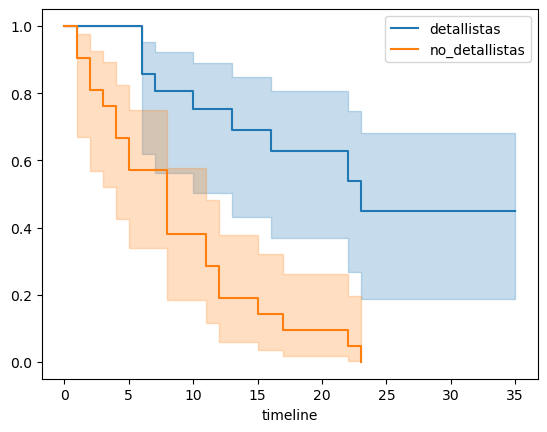

In [13]:
km_d.plot_survival_function(label = 'detallistas')
km_nd.plot_survival_function(label = 'no_detallistas')
plt.show

In [20]:
lrt = logrank_test(detallistas['t'],detallistas['estado'],
                no_detallistas['t'],no_detallistas['estado'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          42.45 <0.005     33.68

H0: funciones de supervivencia iguales.

Ha: funciones de supervivencia diferentes.

A un nivel de confianza del 95% se rechaza H0, por lo tanto las funciones de supervivencia de detallistas y no detallistas son distintas.

In [21]:
cph = CoxPHFitter().fit(relacion, 't', 'estado')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 42 total observations, 12 right-censored observations>
             duration col = 't'
                event col = 'estado'
      baseline estimation = breslow
   number of observations = 42
number of events observed = 30
   partial log-likelihood = -85.01
         time fit was run = 2023-03-13 05:45:28 UTC

---
              coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                           
tratamiento  -1.57       0.21       0.41            -2.38            -0.76                 0.09                 0.47

              cmp to     z      p   -log2(p)
covariate                                   
tratamiento     0.00 -3.81 <0.005      12.83
---
Concordance = 0.69
Partial AIC = 172.02
log-likelihood ratio test = 16.35 on 1 df
-log2(p) of ll-ratio test = 14.21

1 - exp(coef) = 1 - 0.21 = 0.79

Ser detallista disminuye el riesgo de que la relación termine.

En promedio alguien que es detallista tiene 79% menos riesgo de que termine la relación respecto a alguien que no es detallista.